# Figure 3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl

## Settings

In [21]:
TEXT_WIDTH = 6.7261  # in
DPI = 350

In [22]:
def set_font_size(font_size):
    plt.rc('font', size=font_size)          # controls default text sizes
    plt.rc('axes', titlesize=font_size)     # fontsize of the axes title
    plt.rc('axes', labelsize=font_size)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('legend', fontsize=font_size, title_fontsize=font_size)    # legend fontsize
    plt.rc('figure', titlesize=font_size)   # fontsize of the figure title

In [23]:
sb.set(context='paper', style='whitegrid')
plt.rc('grid', linewidth=0.3)
sb.set_palette('colorblind')
set_font_size(6)

## Load Data

In [24]:
performance_bcc = pd.read_csv('results/performance_bcc.csv', index_col=0)
performance_bcc['label'] = ['All Genes' if el=='R_squared' else 'Top 100 DEGs' for el in performance_bcc['metric']]
performance_bcc

,model,patient,metric,score,label
0,rna,su001,R_squared,0.879537,All Genes
1,rna,su001,R_squared_100,0.846293,Top 100 DEGs
2,moe,su001,R_squared,0.929680,All Genes
3,moe,su001,R_squared_100,0.919106,Top 100 DEGs
4,rna,su004,R_squared,0.865561,All Genes
...,...,...,...,...,...
85,by_pre,su009,R_squared_100,0.984247,Top 100 DEGs
86,by_pre,su010,R_squared,0.924642,All Genes
87,by_pre,su010,R_squared_100,0.897282,Top 100 DEGs
88,by_pre,su012,R_squared,0.900709,All Genes


In [25]:
performance_scc = pd.read_csv('results/performance_scc.csv', index_col=0)
performance_scc['label'] = ['All Genes' if el=='R_squared' else 'Top 100 DEGs' for el in performance_scc['metric']]
performance_scc

,model,patient,metric,score,label
0,rna,su010,R_squared,0.800867,All Genes
1,rna,su010,R_squared_100,0.721328,Top 100 DEGs
2,moe,su010,R_squared,0.883323,All Genes
3,moe,su010,R_squared_100,0.855949,Top 100 DEGs
4,rna,su011,R_squared,0.913388,All Genes
5,rna,su011,R_squared_100,0.891939,Top 100 DEGs
6,moe,su011,R_squared,0.888953,All Genes
7,moe,su011,R_squared_100,0.857661,Top 100 DEGs
8,rna,su013,R_squared,0.808897,All Genes
9,rna,su013,R_squared_100,0.727836,Top 100 DEGs


## Plot Image

In [26]:
def plot_barplot(data, fig, ax, title, do_legend=True):
    order = ['rna', 'rna_per_type', 'moe' ,'moe_per_type', 'by_pre']
    plot = sb.barplot(data=data, x='model', y='score', hue='label', order=order, palette=sb.color_palette()[8:10],
                      ax=ax)
    ax.set_title(title)
    ax.set(ylim=(0.5, 0.95))
    plot.set(xlabel=None, ylabel=None)
    
    if do_legend:
        #ax.legend(loc='lower right')
        ax.get_yaxis().set_visible(False)
    else:
        ax.get_legend().remove()
    ax.grid(False)
    sb.despine(ax=ax)

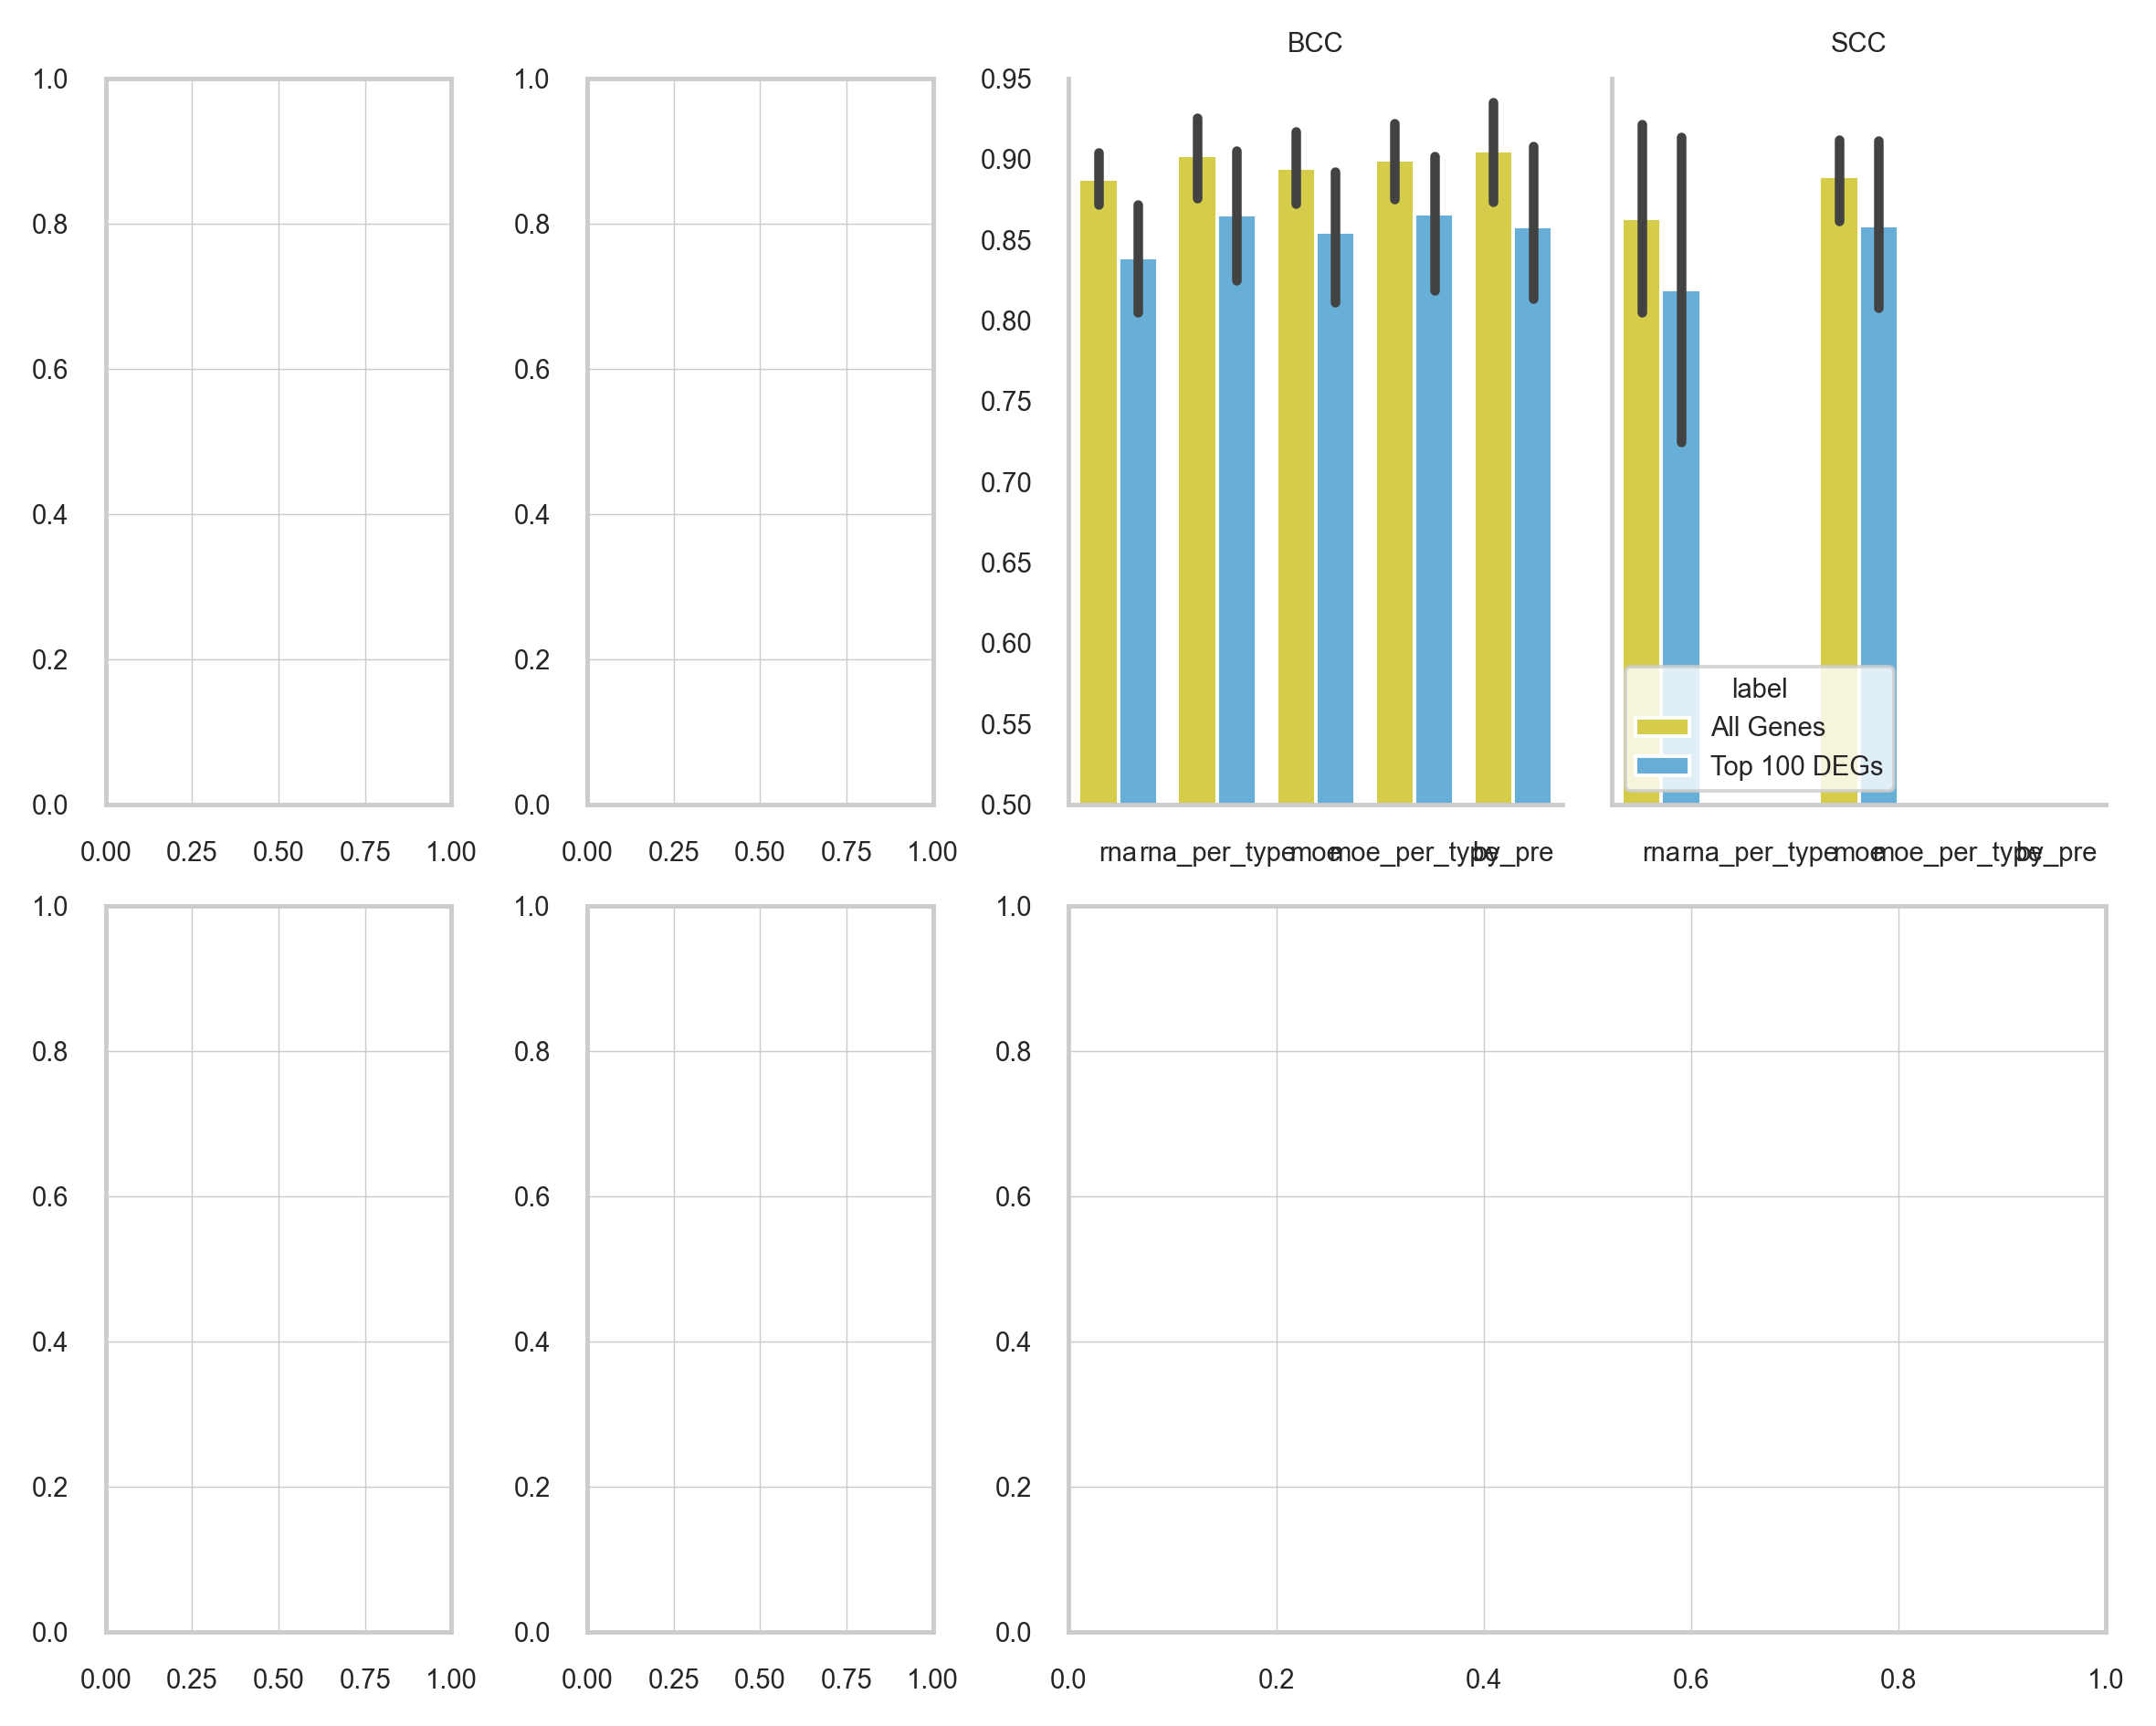

In [27]:
fig = plt.figure(figsize=(TEXT_WIDTH, TEXT_WIDTH * 0.8),
                 dpi=DPI)

gridspec = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=2,
    ncols=3,
    height_ratios=[1, 1],
    width_ratios=[1, 1, 3],
    #wspace=0.1,
    #hspace=2/3,
)
gridspec_3 = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspec[2],
    nrows=1,
    ncols=2,
    height_ratios=[1],
    width_ratios=[1, 1],
    wspace=0.1,
    #hspace=2/3,
)

ax_1 = fig.add_subplot(gridspec[0])
ax_2 = fig.add_subplot(gridspec[1])
ax_31 = fig.add_subplot(gridspec_3[0])
ax_32 = fig.add_subplot(gridspec_3[1])
ax_4 = fig.add_subplot(gridspec[3])
ax_5 = fig.add_subplot(gridspec[4])
ax_6 = fig.add_subplot(gridspec[5])


#plot_umap(ax_)  # umap of the full dataset and explain what we want to do
#plot_ # dataset statistics for scc and bcc

plot_barplot(performance_bcc, fig, ax_31, do_legend=False, title='BCC')  # rna vs moe by cell type
plot_barplot(performance_scc, fig, ax_32, title='SCC')  # rna vs moe by cell type


# plot_reg_plot(ax_) # Real simulation vs pred simulation
# plot_umap() # sample prediction bcc
# plot_umap() # sample prediction scc


#fig.text(0.01, 0.92, 'a', size='large', weight='bold')
#fig.text(0.69, 0.97, 'b', size='large', weight='bold')
#fig.text(0.69, 0.757, 'c', size='large', weight='bold')

#fig.text(0.69, 0.545, 'd', size='large', weight='bold')
#fig.text(0.01, 0.38, 'e', size='large', weight='bold')
#fig.text(0.34, 0.38, 'f', size='large', weight='bold')

fig.tight_layout()
fig.savefig('figures/03_modulation_prediction_2.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('figures/03_modulation_prediction_2.png',
           dpi=DPI, bbox_inches='tight')

In [28]:
performance_bcc.groupby(['model', 'metric']).mean()

score
model        metric                 
by_pre       R_squared      0.905281
             R_squared_100  0.858382
moe          R_squared      0.894455
             R_squared_100  0.855069
moe_per_type R_squared      0.899440
             R_squared_100  0.866044
rna          R_squared      0.887801
             R_squared_100  0.839003
rna_per_type R_squared      0.902319
             R_squared_100  0.865468

In [10]:
performance_bcc.groupby(['model', 'metric']).mean()

score
model        metric                 
by_pre       R_squared      0.905281
             R_squared_100  0.858382
moe          R_squared      0.900097
             R_squared_100  0.863653
moe_per_type R_squared      0.900735
             R_squared_100  0.865814
rna          R_squared      0.899271
             R_squared_100  0.861635
rna_per_type R_squared      0.900595
             R_squared_100  0.866719